# Telecorm Case Study:

**Tasks:**

**Part--1**

1. Data exploration and missing value identification
2. Missing value treatment and outlier analysis
3. Deriving the target feature based on 9 month data
4. Exploratory Data Analysis to understand trend between the target Churn and various independant features.


**Part--2 Model Building**

1. Handling class imbalance and reducing the features using the PCA
2. Applying Logistic Regression, Decision Tree, Random Forest and AdaBoost models on the data.
3. Using Hyper-parameter tuning for all the above models and prescribe the model which produces least sensitivity.

**Part--3 Model Interpretability**

1. Using the Train and Test data without PCA application.
2. Using Decision Tree model to weight the important features of the data to provide the bussiness recommendation



# **Part--1**

**Data exploration and missing value identification**

In [190]:
##Importing first-level necessary libraries and we shall import others as we proceed along
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [191]:
data=pd.read_csv('telecom_churn_data.csv')

In [192]:
##Printing the row and column of the data
print('The row count and column count are....',data.shape[0],'and',data.shape[1],'respectively')

The row count and column count are.... 99999 and 226 respectively


In [193]:
##Checking for duplicated data an dno duplicates
data.duplicated().sum()

0

In [194]:
#### We have quite many columns and now let us find the null values and percentage of null values
null_values=data.isnull().sum()/len(data)
null_values_perc=round(null_values*100,2)
null_values_perc[null_values.sort_values(ascending=False)>0.7]


date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [195]:
##We shall split into numerical and object columns
numerical_int_cols=data.select_dtypes(include='int64')
numerical_int_cols.columns

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aon'], dtype='object')

In [196]:
numerical_float_cols=data.select_dtypes(include='float64')
numerical_float_cols.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       ...
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object', length=179)

In [197]:
object_cols=data.select_dtypes(include='object')
object_cols.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], dtype='object')

In [198]:
numerical_columns=numerical_int_cols.columns.tolist()+numerical_float_cols.columns.tolist()


In [199]:
##It seems that the date and recharge column holds the maximum number of zeros. Let us investigate further
date_column=[]
recharge_column=[]
for i in data.columns:
    if 'date' in i:
        date_column.append(i)
    elif 'rech' in i:
        recharge_column.append(i)


In [200]:
recharge_column

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

If we observe the recharge columns for the months of 6,7,8 and 9 there are the following descriptions:

1. Total_reach_num ----> Total_Recharge_Number
2. Max_reach_amt------> Amount in local currency
3. total_reach_data---->Total recharge data
4. Max_recharge_data---->Maximum recharge data
5. av_rech_amt_data---->Average Recharge data

In [201]:
## Analysing the statistical parameters of the reach colums

data[recharge_column].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


We shall extarct the last recharge date and the recharge pattern of the months 

In [202]:
l1=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']
l2=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
for i,j  in zip(l1,l2):
    print(i, len(data.loc[data[i].isnull() & data[j].isnull()]))



total_rech_data_6 74846
total_rech_data_7 74428
total_rech_data_8 73660
total_rech_data_9 74077


In [203]:
##Extending the check for all average recharge of all months with respect to the 

l1=['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
l2=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
for i,j  in zip(l1,l2):
    print(i, len(data.loc[data[i].isnull() & data[j].isnull()]))



av_rech_amt_data_6 74846
av_rech_amt_data_7 74428
av_rech_amt_data_8 73660
av_rech_amt_data_9 74077


In [204]:
l1=['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']
l2=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
for i,j  in zip(l1,l2):
    print(i, len(data.loc[data[i].isnull() & data[j].isnull()]))


max_rech_data_6 74846
max_rech_data_7 74428
max_rech_data_8 73660
max_rech_data_9 74077


In [205]:
l1=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9']
l2=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
for i,j  in zip(l1,l2):
    print(i, len(data.loc[data[i].isnull() & (data[j].isnull())]))


count_rech_2g_6 74846
count_rech_2g_7 74428
count_rech_2g_8 73660
count_rech_2g_9 74077


In [206]:
l1=['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9']
l2=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
for i,j  in zip(l1,l2):
    print(i, len(data.loc[data[i].isnull() & (data[j].isnull())]))


count_rech_3g_6 74846
count_rech_3g_7 74428
count_rech_3g_8 73660
count_rech_3g_9 74077


Important Observation:
    1. We observe that all of the recharge columns showing null values provided that the recharge date column is also null
    2. We shall impute the value to 0 as n recharge is done


In [207]:
zero_impute=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
           'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
            'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
             'count_rech_2g_9','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9']

In [208]:
data[zero_impute]=data[zero_impute].apply(lambda x: x.fillna(0))

In [209]:
##Checking the missing values again
#### We have quite many columns and now let us find the null values and percentage of null values
null_values=data.isnull().sum()/len(data)
null_values_perc=round(null_values*100,2)
null_values_perc[null_values.sort_values(ascending=False)>0.6]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7                   74.43
fb_user_8                   73.66
fb_user_9                   74.08
dtype: float64

In [210]:
## We shall remove all the above missing values >60%

to_remove=null_values_perc[null_values.sort_values(ascending=False)>0.6].index.tolist()
data.drop(to_remove,inplace=True,axis=1)

In [211]:
##Checking null values again

null_values=data.isnull().sum()/len(data)
null_values_perc=round(null_values*100,2)
null_values_perc[null_values.sort_values(ascending=False)>0]

loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou_8        5.38
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou

In [212]:
##Removing the date and id columns

data.drop(['circle_id','date_of_last_rech_6','date_of_last_rech_7',
          'date_of_last_rech_8','date_of_last_rech_9','last_date_of_month_6','last_date_of_month_7',
          'last_date_of_month_8','last_date_of_month_9'],axis=1,inplace=True)

In [213]:
##We hall use the KNN imputer to treat the rest of the missing values

null_values=data.isnull().sum()/len(data)
null_values_perc=round(null_values*100,2)
null_values_perc=null_values_perc[null_values.sort_values(ascending=False)>0]


Checking the statistical parameters of the missing values

In [214]:
data[null_values_perc.index.tolist()].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107

From the above statisticalparameter of missing values it is evident that there are there any monotonic values present in the feature as they 
will not add any insights.

In [215]:
to_remove=[]
for i in null_values_perc.index.tolist():
    if data[i].nunique()==1:
        to_remove.append(i)
print(to_remove)
        
    

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [216]:
data.drop(to_remove,axis=1,inplace=True)

Let us check again the percentage of missing values

In [217]:
null_values=data.isnull().sum()/len(data)
null_values_perc=round(null_values*100,2)
null_values_perc=null_values_perc[null_values.sort_values(ascending=False)>0]
null_values_perc

onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_6    3.94
std_og_t2t_mou_7    3.86
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75


Let us create a sample code which identifies outliers in the data and impute them with mean else we shall impute them with median

In [218]:
mean_imputation=[]
median_imputation=[]
for j in null_values_perc.index.tolist():
    highest=data[j].mean() + 3*data[j].std()
    lowest=data[j].mean() - 3*data[j].std()
    if len(data[(data[j]>highest)| (data[j]<lowest)])!=0:
        median_imputation.append(j)
    else:
        mean_imputation.append(j)
        
        
    

In [219]:
median_imputation

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


This shows that all the above missing data contains outliers so we shall impute using the median imputation

In [220]:
data[median_imputation]=data[median_imputation].fillna(data[median_imputation].median())

In [221]:
##Checking the missing values again

null_values=data.isnull().sum()/len(data)
null_values_perc=round(null_values*100,2)
null_values_perc=null_values_perc[null_values.sort_values(ascending=False)>0]
null_values_perc

Series([], dtype: float64)

**3.Deriving the target feature based on 9 month data***

As per the description stated, we need to derive the churn as it is explicitly not present in the data. The following steps are:
    
    1. Calculate the total recharge amount for June and July ( total reach data*average amt for the particular month)
    2. Calculate the total call recharge and data recharge amount (total recharge amt+call recharge amount)
    3.Calculate the average of the total call and data recharge amount for 6 anf 7,store it in new coulmn
    4.Extarct the 70th percentile of the obtained data

**Churn prediction:**
    
    1.With the filtered data we need to find if there are customers who were active september which 
      means we need to find if the columns total incoming and outgoing minutes of usage along 
      with the 2g and 3g data consumpion are not zero.
    2.If the aforementioned columns are zero then it clearly indicates that the cutsomer has churned else not churned.

In [222]:
# calculate the total data recharge amount for June and July ( total reach data*average amt for the particular month)
data['6_month_total_recharge'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['7_month_total_recharge'] = data.total_rech_data_7 * data.av_rech_amt_data_7

In [223]:
# Calculate the total call recharge and data recharge amount (total recharge amt+call recharge amount)
data['6_month_total_amt'] = data.total_rech_amt_6 + data['6_month_total_recharge']
data['7_month_total_amt'] = data.total_rech_amt_7 + data['7_month_total_recharge']

In [224]:
#Calculate the average of the total call and data recharge amount for 6 anf 7,store it in new coulmn
data['6_7_avg_amt_data'] = (data['6_month_total_amt'] + data['7_month_total_amt'])/2

In [225]:
#Extarct the 70th percentile of the obtained data
print("High values customer at 70th percentile : {0}".format(data['6_7_avg_amt_data'].quantile(0.7)))

High values customer at 70th percentile : 478.0


In [226]:
#Retaining only the high values customers and removing others

imp_cust=data.loc[(data['6_7_avg_amt_data']>data['6_7_avg_amt_data'].quantile(0.7)),:]


In [227]:
##The dimension of the data are as follows:

print(imp_cust.shape)

(29953, 191)


Note as mentioned in the task we have around 29.9k rows

We used the above derived features as proxies to extract the high value customers, we shall now remove them


In [228]:
imp_cust.drop(['6_month_total_recharge','7_month_total_recharge','6_month_total_amt','7_month_total_amt',
              '6_7_avg_amt_data'],inplace=True,axis=1)

**Churn derivation**

In [229]:
# calculate total incoming and outgoing minutes of usage
imp_cust['9_month_total_calls'] = imp_cust.total_ic_mou_9 + imp_cust.total_og_mou_9

In [230]:
# calculate 2g and 3g data consumption
imp_cust['9_month_total_internet'] =  imp_cust.vol_2g_mb_9 + imp_cust.vol_3g_mb_9

In [231]:
#We now create the churn variable based on the above data ---->0 for not churn and 1 for churn. We use lambda function

imp_cust['churn']=imp_cust.apply(lambda x:1 if (x['9_month_total_calls']==0 and x['9_month_total_internet']==0) else 0,axis=1)


<Figure size 720x288 with 0 Axes>

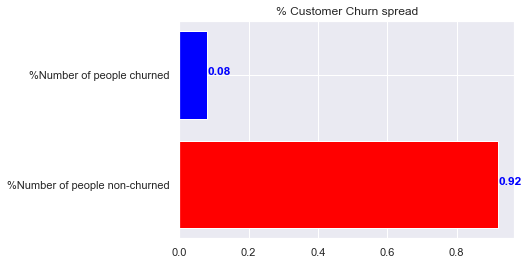

In [232]:
##Distribution of the target variable
plt.figure(figsize=[10,4])
fig, ax = plt.subplots()
p1=round(imp_cust.churn.value_counts(normalize=True)[0],2)
p2=round(imp_cust.churn.value_counts(normalize=True)[1],2)
y=[p1,p2]
x=['%Number of people non-churned','%Number of people churned']
plt.barh(x,y,color={'red','blue'})
plt.title('% Customer Churn spread')
for i, v in enumerate(y):
    ax.text(v-0.0001, i, str(v), color='blue', fontweight='bold')
plt.show()

The data is highly imbalanced as the there are only 8% people who churned against the 92% people not-churned

In [233]:
##Let us remove all churn related columnsbecause our prediction is going to be based out of three months
to_remove=[]
for i in imp_cust.columns.tolist():
    if ('_9' in i ) or ('9_' in i):
        to_remove.append(i)
print(to_remove)
        


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', '9_month_total_calls', '9_month_total_internet']


In [234]:
imp_cust.drop(to_remove,axis=1,inplace=True)
print(imp_cust.shape)

(29953, 142)


**Deriving important variables**

1. If we observe we have months 6 and 7 data, we shall take the average of them and compare with the month_8 data to draw some inferences

In [235]:
##Let us extract all the columns with 6 and 7 month and let us take the average of them.

sixth_month_data=[]
seventh_month_data=[]
for i in imp_cust.columns.tolist():
    if '_6' in i:
        sixth_month_data.append(i)
    elif '_7' in i:
        seventh_month_data.append(i)

        

In [236]:
##We are going to take the average of columns for the below entries and we are gonna compare this with the 8th month
for i,j in zip(sixth_month_data,seventh_month_data):
    print(i,'_____',j)
        

arpu_6 _____ arpu_7
onnet_mou_6 _____ onnet_mou_7
offnet_mou_6 _____ offnet_mou_7
roam_ic_mou_6 _____ roam_ic_mou_7
roam_og_mou_6 _____ roam_og_mou_7
loc_og_t2t_mou_6 _____ loc_og_t2t_mou_7
loc_og_t2m_mou_6 _____ loc_og_t2m_mou_7
loc_og_t2f_mou_6 _____ loc_og_t2f_mou_7
loc_og_t2c_mou_6 _____ loc_og_t2c_mou_7
loc_og_mou_6 _____ loc_og_mou_7
std_og_t2t_mou_6 _____ std_og_t2t_mou_7
std_og_t2m_mou_6 _____ std_og_t2m_mou_7
std_og_t2f_mou_6 _____ std_og_t2f_mou_7
std_og_mou_6 _____ std_og_mou_7
isd_og_mou_6 _____ isd_og_mou_7
spl_og_mou_6 _____ spl_og_mou_7
og_others_6 _____ og_others_7
total_og_mou_6 _____ total_og_mou_7
loc_ic_t2t_mou_6 _____ loc_ic_t2t_mou_7
loc_ic_t2m_mou_6 _____ loc_ic_t2m_mou_7
loc_ic_t2f_mou_6 _____ loc_ic_t2f_mou_7
loc_ic_mou_6 _____ loc_ic_mou_7
std_ic_t2t_mou_6 _____ std_ic_t2t_mou_7
std_ic_t2m_mou_6 _____ std_ic_t2m_mou_7
std_ic_t2f_mou_6 _____ std_ic_t2f_mou_7
std_ic_mou_6 _____ std_ic_mou_7
total_ic_mou_6 _____ total_ic_mou_7
spl_ic_mou_6 _____ spl_ic_mou_7
isd_

In [237]:
##We shall implement the dynamic way of column naming
##imp_cust['avg_'+i+'_7']
for i,j in zip(sixth_month_data,seventh_month_data):
    imp_cust['avg_'+i+'_7']=(imp_cust[i]+imp_cust[j])/2

In [238]:
##We shall now remove the data corresponding to 6 and 7 as we already taken the average

total_remove=sixth_month_data+seventh_month_data
imp_cust.drop(total_remove,axis=1,inplace=True)
print('The final dataframe for modelling and interpretation____',imp_cust.shape)

The final dataframe for modelling and interpretation____ (29953, 97)


In [239]:
imp_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_arpu_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2t_mou_6_7,avg_loc_og_t2m_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_loc_og_mou_6_7,avg_std_og_t2t_mou_6_7,avg_std_og_t2m_mou_6_7,avg_std_og_t2f_mou_6_7,avg_std_og_mou_6_7,avg_isd_og_mou_6_7,avg_spl_og_mou_6_7,avg_og_others_6_7,avg_total_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_loc_ic_t2m_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_loc_ic_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_std_ic_t2f_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_isd_ic_mou_6_7,avg_ic_others_6_7,avg_total_rech_num_6_7,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_total_rech_data_6_7,avg_max_rech_data_6_7,avg_count_rech_2g_6_7,avg_count_rech_3g_6_7,avg_av_rech_amt_data_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,1.0,252.0,0.0,1.0,252.0,5.75,109.61,0,0,1,0,968,30.40,0.00,101.20,3.58,1,206.1005,33.32,94.0225,0.00,0.000,11.760,40.730,0.000,0.0,64.3975,0.000,3.7925,0.00,11.365,0.000,0.00,0.0,0.000,15.715,56.785,0.905,92.355,0.000,2.035,0.000,5.925,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,1,1209.5150,56.26,510.2950,24.86,18.165,41.385,378.005,58.635,0.0,478.0350,13.795,40.8250,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.00,0,435.4720,382.36,87.6450,0.00,0.000,257.360,75.770,0.000,0.0,333.1350,124.995,11.8650,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0,556.1030,117.26,827.3050,0.00,0.000,5.320,89.870,0.375,0.0,95.5650,111.935,737.0500,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.

In [240]:
## Let us finally analyze the data types:

imp_cust.dtypes

mobile_number               int64  
arpu_8                      float64
onnet_mou_8                 float64
offnet_mou_8                float64
roam_ic_mou_8               float64
roam_og_mou_8               float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_8            float64
loc_og_t2c_mou_8            float64
loc_og_mou_8                float64
std_og_t2t_mou_8            float64
std_og_t2m_mou_8            float64
std_og_t2f_mou_8            float64
std_og_mou_8                float64
isd_og_mou_8                float64
spl_og_mou_8                float64
og_others_8                 float64
total_og_mou_8              float64
loc_ic_t2t_mou_8            float64
loc_ic_t2m_mou_8            float64
loc_ic_t2f_mou_8            float64
loc_ic_mou_8                float64
std_ic_t2t_mou_8            float64
std_ic_t2m_mou_8            float64
std_ic_t2f_mou_8            float64
std_ic_mou_8                float64
total_ic_mou_8              

In [241]:
##We shall convert the churn data to the category
imp_cust.churn=imp_cust.churn.astype('category')

In [242]:
imp_cust.churn.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

***Outlier Treatment***

We inferred from the median impuatation that the presence of outliers in the dataset is humongous, so proceed with 
capping them.

For outlier capping we can follow two step process

1. If the data is less skewed, we shall cap the data based on (Mean +/- 3*Std)
2. If the data is skewed ( meaning skewnes measure >|1|), we shall use the IQR treatment (since the aforementioned mean and Std would have serious influence on the data)

In [243]:
from scipy.stats import skew

In [244]:
skewed_dist=[]
normal_dist=[]
for i in imp_cust.columns.tolist():
    if (i!='churn'):
        if np.abs(skew(imp_cust[i]))>1:
            skewed_dist.append(i)
        else:
            normal_dist.append(i)
print('The number of highly skewed columns___',len(skewed_dist))
print('The number of normal distributed columns___',len(normal_dist) , normal_dist)
            
    
        
        
    

The number of highly skewed columns___ 94
The number of normal distributed columns___ 2 ['mobile_number', 'aon']


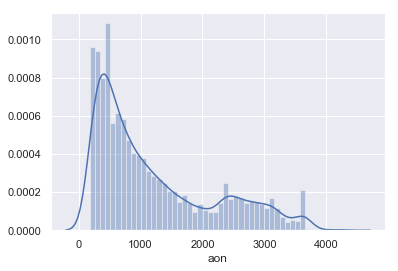

In [245]:
## We have almost all data to be skewed but we have one column 'aon' which tends to be not skewed

sns.distplot(imp_cust.aon,kde=True)
plt.show()

The column aon represents that 'Age on network - number of days the customer is using the operator T network'
We shall divide the column by 365 so that we get the cutomers and their retention period

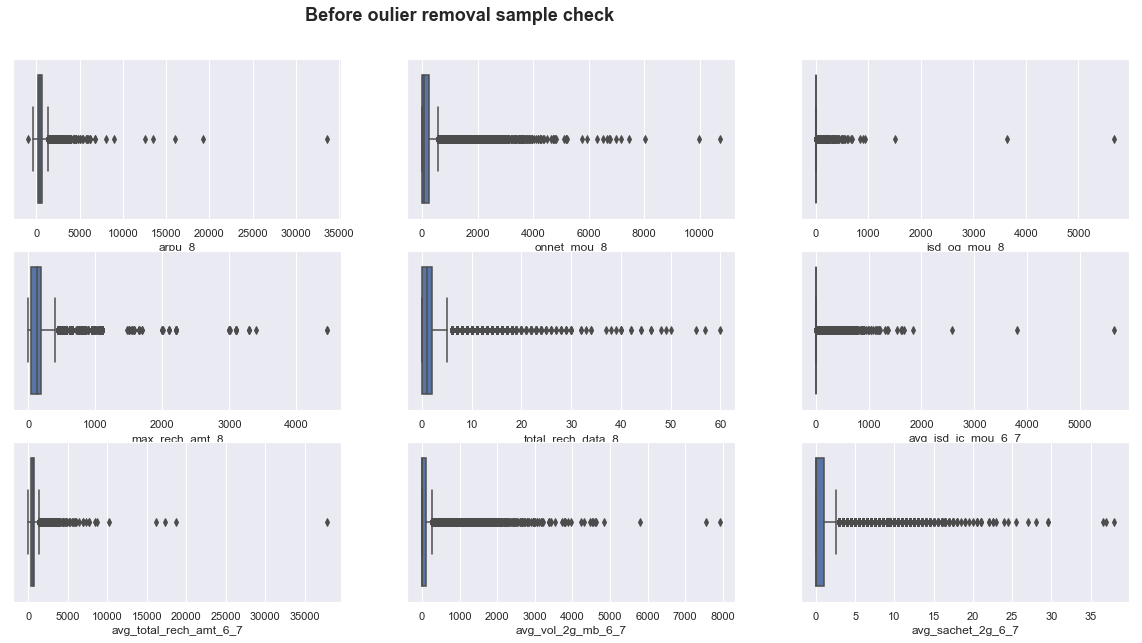

In [246]:
##Sample output
plt.figure(figsize=[20,10])
plt.subplot(3,3,1)
sns.boxplot(imp_cust.arpu_8)
plt.subplot(3,3,2)
sns.boxplot(imp_cust.onnet_mou_8)
plt.subplot(3,3,3)
sns.boxplot(imp_cust.isd_og_mou_8)
plt.subplot(3,3,4)
sns.boxplot(imp_cust.max_rech_amt_8)
plt.subplot(3,3,5)
sns.boxplot(imp_cust.total_rech_data_8)
plt.subplot(3,3,6)
sns.boxplot(imp_cust.avg_isd_ic_mou_6_7)
plt.subplot(3,3,7)
sns.boxplot(imp_cust.avg_total_rech_amt_6_7)
plt.subplot(3,3,8)
sns.boxplot(imp_cust.avg_vol_2g_mb_6_7)
plt.subplot(3,3,9)
sns.boxplot(imp_cust.avg_sachet_2g_6_7)
plt.title('Before oulier removal sample check',y=3.6,x=-1.04,size=18,fontweight="bold")
fig.tight_layout()
plt.show()

In [247]:
for cols in imp_cust.columns.tolist():
    if cols!='churn' and cols!='aon':
        upper_limit = imp_cust[cols].quantile(0.99)
        lower_limit = imp_cust[cols].quantile(0.01)
        imp_cust[cols] = np.where(imp_cust[cols] > upper_limit,
        upper_limit,
        np.where(imp_cust[cols] < lower_limit,
        lower_limit,
        imp_cust[cols]))

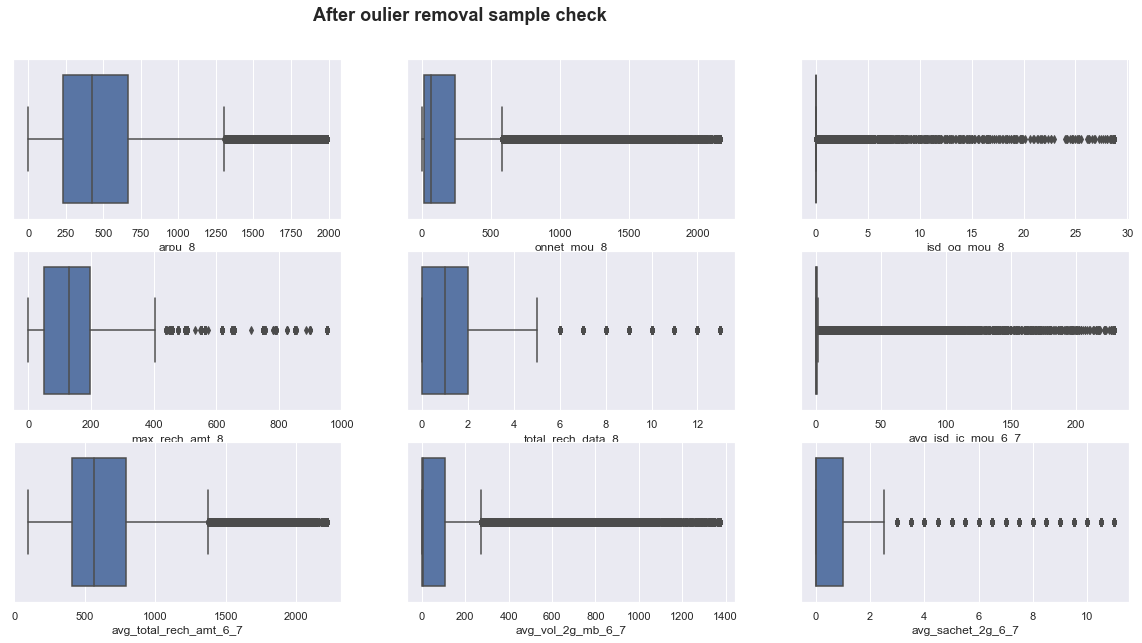

In [248]:
##Sample output
plt.figure(figsize=[20,10])
plt.subplot(3,3,1)
sns.boxplot(imp_cust.arpu_8)
plt.subplot(3,3,2)
sns.boxplot(imp_cust.onnet_mou_8)
plt.subplot(3,3,3)
sns.boxplot(imp_cust.isd_og_mou_8)
plt.subplot(3,3,4)
sns.boxplot(imp_cust.max_rech_amt_8)
plt.subplot(3,3,5)
sns.boxplot(imp_cust.total_rech_data_8)
plt.subplot(3,3,6)
sns.boxplot(imp_cust.avg_isd_ic_mou_6_7)
plt.subplot(3,3,7)
sns.boxplot(imp_cust.avg_total_rech_amt_6_7)
plt.subplot(3,3,8)
sns.boxplot(imp_cust.avg_vol_2g_mb_6_7)
plt.subplot(3,3,9)
sns.boxplot(imp_cust.avg_sachet_2g_6_7)
plt.title('After oulier removal sample check',y=3.6,x=-1.04,size=18,fontweight="bold")
fig.tight_layout()
plt.show()

To be precise we shall generate a whole set of model which is exclusively reserved for outliers.However,
 this method is not followed here but in the future we shall proceed with

1. Extract all the outliers and store them in a separate file to incorporate the ML modelling techniques into them separately.
2. We shall use quantile regression without actually remvoing or capping the outliers


***4.Exploratory Data Analysis to understand trend between the target Churn and various independant features.***

**Analysing the distribution of aon variable (Univariate)**

If we observe the aon column, it denotes the retention of the users in days, we shall convert then to year

In [249]:
imp_cust.aon=imp_cust.aon//365

<Figure size 720x288 with 0 Axes>

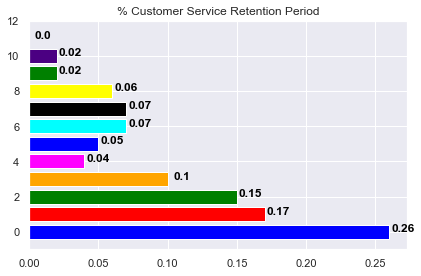

In [250]:
##Distribution of the customer retention (inyears)
plt.figure(figsize=[10,4])
fig, ax = plt.subplots()
color=['red','blue','green','orange','cyan','magenta','black','yellow','blue','green','indigo','purple']
x=[]
index_val=imp_cust.aon.value_counts().index.tolist()
y=[]
for i in range(0,imp_cust.aon.nunique()):
    pi=round(imp_cust[imp_cust.churn==0].aon.value_counts(normalize=True)[i],2)
    y.append(pi)
    x.append(index_val[i])
plt.barh(x,y,color= color)
plt.title('% Customer Service Retention Period')
for i, v in zip(x, y): 
    ax.text(v+0.01,i, str(v), color='black', fontweight='bold',ha='center')
fig.tight_layout()
plt.show()

<Figure size 720x288 with 0 Axes>

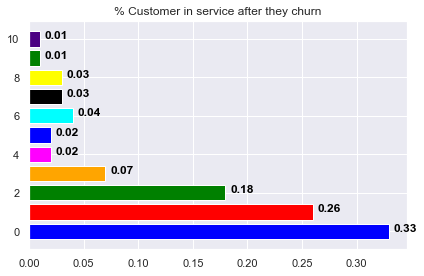

In [251]:
##Customer in srvice after they churn(inyears)
plt.figure(figsize=[10,4])
fig, ax = plt.subplots()
color=['red','blue','green','orange','cyan','magenta','black','yellow','blue','green','indigo','purple']
x=[]
index_val=imp_cust.aon.value_counts().index.tolist()
y=[]
for i in range(0,imp_cust.aon.nunique()-1):
    pi=round(imp_cust[imp_cust.churn==1].aon.value_counts(normalize=True)[i],2)
    y.append(pi)
    x.append(index_val[i])
plt.barh(x,y,color= color)
plt.title('% Customer in service after they churn')
for i, v in zip(x, y): 
    ax.text(v+0.015,i, str(v), color='black', fontweight='bold',ha='center')
fig.tight_layout()
plt.show()

So here we infer that the churn rate is highest for the newly joined customers, also we are able to observe that the 
even loyal customers do churn as the rate of % is nearly 50% for them as opposed 75% for the new customers

**To find even more granularity in the above judgement, we shall bin the customers into four buckets only for the EDA purpose:**

**New customers (0-2yrs)**

**Gold customers (3-6 yrs)**

**Diamond customers (7-9 yrs)**

**Platinum customers (>9yrs)**

In [252]:
##Bucketing the longevity of the service of the customers based on the retention and churn 

#We started with -1 while binning because we have customers with 0 year ( in months)

labels = ['New Cust', 'Gold Cust', 'Diamond Cust','Platinum Cust']
imp_cust['Cust_Period'] = pd.cut(imp_cust['aon'], [-1, 2, 6, 9,1000], labels=labels)

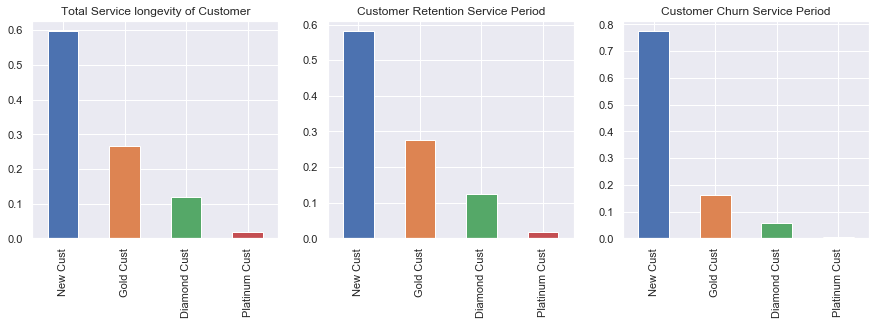

In [253]:
##Distribution of the target variable
plt.figure(figsize=[15,4])
plt.subplot(1,3,1)
imp_cust.Cust_Period.value_counts(normalize=True).plot.bar()
plt.title('Total Service longevity of Customer')
plt.subplot(1,3,2)
imp_cust[imp_cust['churn']==0].Cust_Period.value_counts(normalize=True).plot.bar()
plt.title('Customer Retention Service Period')
plt.subplot(1,3,3)
imp_cust[imp_cust['churn']==1].Cust_Period.value_counts(normalize=True).plot.bar()
plt.title('Customer Churn Service Period')
fig.tight_layout()
plt.show()


It is evident that the most churns have been reported from the new customers when compared to gold and platinum customers and also we shall notice that the most customers are new to the industry


We have the average revenue columns for 6_7 month (average of 6 and 7) and 8 month data. We create a separate column which measures
the recharge increase between the 6_7 and 8 month, we shall have a rough estimate that if the difference between the 8th month 
revenue average and the corresponding 6_7 months is greater than 0, then the customer shows interest towards the service,else
the customer's interest diminishes 

In [254]:
imp_cust['Revenue_calc']=imp_cust['arpu_8']-imp_cust['avg_arpu_6_7']

In [255]:
imp_cust['Revenue_Status']=imp_cust.apply(lambda x: 0 if x['arpu_8']-x['avg_arpu_6_7']<0 else 1,axis=1)

We shall now do the revenue analysis with respect to the customer type

***Distribution of Revenue_Status***

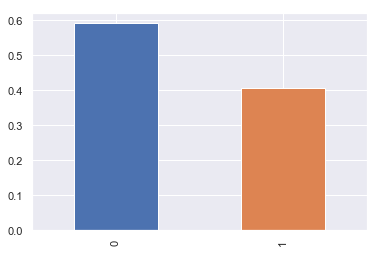

In [256]:
imp_cust.Revenue_Status.value_counts(normalize=True).plot.bar()
plt.show()

1. This shows that over 40% of customers generated revenue in the the 8 month which is more or the same as generated by them in the previous months of June and July.

2. Over 58% of customers roughly show the declined path towards the revenue generation as they sporadically recharge in the    August month compared to June and July.

We analyse how the customer segment is playing the role in the Revenue Generation

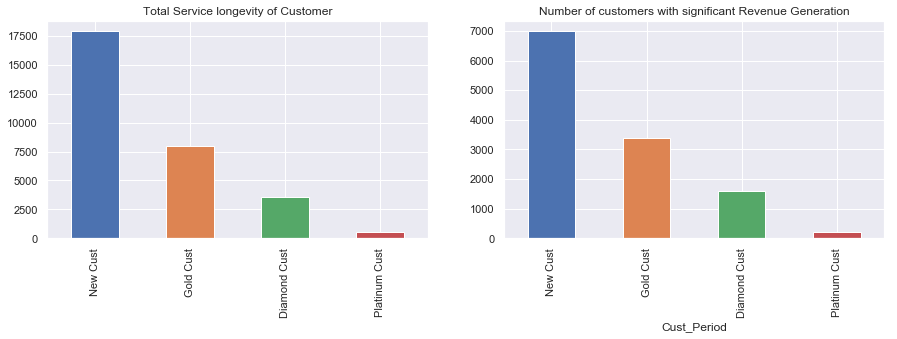

In [257]:
plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
imp_cust.Cust_Period.value_counts().plot.bar()
plt.title('Total Service longevity of Customer')
plt.subplot(1,2,2)
imp_cust.groupby('Cust_Period').sum()['Revenue_Status'].plot.bar()
plt.title('Number of customers with significant Revenue Generation')
plt.show()

In [258]:
#We shall infer from the above graph the following

imp_cust.groupby('Cust_Period').sum()['Revenue_Status']

Cust_Period
New Cust         6986
Gold Cust        3400
Diamond Cust     1587
Platinum Cust    233 
Name: Revenue_Status, dtype: int64

In [259]:
rev_stat=np.array(imp_cust.groupby('Cust_Period').sum()['Revenue_Status'].values.tolist())
cust_stat=np.array(imp_cust.Cust_Period.value_counts().values.tolist())
rev_per=rev_stat/cust_stat
cust_period=imp_cust.Cust_Period.value_counts().index.tolist()
for i ,j in zip(rev_per,cust_period):
    print('The revenue generated by the',j,'is :',round(i*100,2),'%')
    



The revenue generated by the New Cust is : 39.1 %
The revenue generated by the Gold Cust is : 42.68 %
The revenue generated by the Diamond Cust is : 44.17 %
The revenue generated by the Platinum Cust is : 44.38 %


The above stat shows that there is roughly the same trend in the revenue generation of the people.
But, we know that the population of customers belonging to the new class dominates others, yet their contribution towards
the revenue is slightly behind the less poulated platinum and diamond class.


***Analysing more on the revenue distribution***

In [260]:
##Analyzing the statistical distribution of the revenue generated column
imp_cust.Revenue_calc.describe()


count    29953.000000
mean    -52.667853   
std      292.368662  
min     -1869.980900 
25%     -178.457500  
50%     -39.855000   
75%      84.183000   
max      1903.018880 
Name: Revenue_calc, dtype: float64

We notice that there are only few customers at the 75th percentile or greater generated significant revenue, since the proportion
is less we shall give some specialised offers or discounts based on the customer band categorised

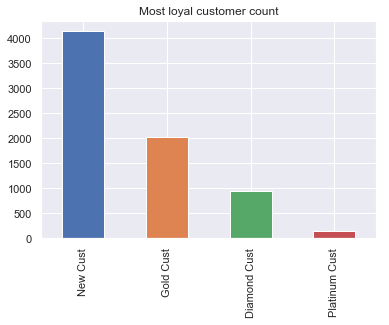

In [261]:
##Extracting the 75th percentile based on revenue generated

most_loyal_cust=imp_cust[(imp_cust.Revenue_calc>=imp_cust.Revenue_calc.quantile(0.75))&(imp_cust.churn==0)].Cust_Period.value_counts()
most_loyal_cust.plot.bar()
plt.title('Most loyal customer count')
plt.show()

**Suggestion to the business:**
    
  1. The above set of customers recharged in the month of August which is greater or equal to the average amount they                recharged on July and June months respectively.
  
        
  2. Also these people have not swayed from the business. So we can give them  special discounts.The phone numbers are found in      the data imp_cust
  
    
  3. For newly joined people we shall offer them a few couple of free services and insentives or gifts.
  
    
  4. For the people who are associated with the service over a longer period of time(say>5 years:Gold,Diamond or Platinum)
     we shall offer them a free scheme say monthly topup at free cost etc.,

***Let us plot some bivariate box plot with churn variable***

In [262]:
def bivariate(var1,var2):
    sns.boxplot(var1,var2)
    plt.show()

In [263]:
imp_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_arpu_6_7,avg_onnet_mou_6_7,avg_offnet_mou_6_7,avg_roam_ic_mou_6_7,avg_roam_og_mou_6_7,avg_loc_og_t2t_mou_6_7,avg_loc_og_t2m_mou_6_7,avg_loc_og_t2f_mou_6_7,avg_loc_og_t2c_mou_6_7,avg_loc_og_mou_6_7,avg_std_og_t2t_mou_6_7,avg_std_og_t2m_mou_6_7,avg_std_og_t2f_mou_6_7,avg_std_og_mou_6_7,avg_isd_og_mou_6_7,avg_spl_og_mou_6_7,avg_og_others_6_7,avg_total_og_mou_6_7,avg_loc_ic_t2t_mou_6_7,avg_loc_ic_t2m_mou_6_7,avg_loc_ic_t2f_mou_6_7,avg_loc_ic_mou_6_7,avg_std_ic_t2t_mou_6_7,avg_std_ic_t2m_mou_6_7,avg_std_ic_t2f_mou_6_7,avg_std_ic_mou_6_7,avg_total_ic_mou_6_7,avg_spl_ic_mou_6_7,avg_isd_ic_mou_6_7,avg_ic_others_6_7,avg_total_rech_num_6_7,avg_total_rech_amt_6_7,avg_max_rech_amt_6_7,avg_last_day_rch_amt_6_7,avg_total_rech_data_6_7,avg_max_rech_data_6_7,avg_count_rech_2g_6_7,avg_count_rech_3g_6_7,avg_av_rech_amt_data_6_7,avg_vol_2g_mb_6_7,avg_vol_3g_mb_6_7,avg_monthly_2g_6_7,avg_sachet_2g_6_7,avg_monthly_3g_6_7,avg_sachet_3g_6_7,Cust_Period,Revenue_calc,Revenue_Status
0,7.000843e+09,213.8030,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2.0,252.00,252.0,252.0,1.0,252.0,0.0,1.0,252.0,5.75,109.61,0.0,0.0,1.0,0.0,2,30.40,0.00,101.20,3.58,1,206.1005,33.32,94.0225,0.00,0.000,11.760,40.730,0.000,0.0,64.3975,0.000,3.7925,0.00,11.365,0.000,0.00,0.0,0.000,15.715,56.785,0.905,92.355,0.000,2.035,0.000,5.925,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,0.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,New Cust,7.7025,1
7,7.000702e+09,1986.7396,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7.0,2341.48,951.0,565.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2,57.74,19.38,18.74,0.00,1,1209.5150,56.26,510.2950,24.86,18.165,41.385,378.005,58.635,0.0,478.0350,13.795,40.8250,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,799.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,New Cust,777.2246,1
8,7.001525e+09,137.3620,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14.0,120.00,30.0,10.0,3.0,23.0,3.0,0.0,69.0,0.03,11.94,0.0,3.0,0.0,0.0,0,21.03,910.65,122.16,0.00,0,435.4720,382.36,87.6450,0.00,0.000,257.360,75.770,0.000,0.0,333.1350,124.995,11.8650,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,77.0,1.0,0.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,New Cust,-298.1100,0
21,7.002124e+09,637.7600,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27.0,718.00,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1,0.00,0.00,0.00,0.00,0,556.1030,117.26,827.3050,0.00,0.000,5.320,89.870,0.375,0.0,95.5650,111.935,737.0500,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,New

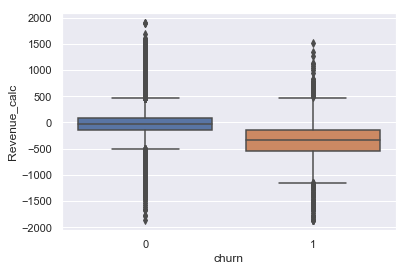

In [264]:
bivariate(imp_cust.churn,imp_cust.Revenue_calc)

We see that the median difference in revenue generated is zero by the customers during the August month with respect to the 
average of June and July, this means that majority of the customers either recharge far less or they show more interest towards the
service. As we saw before only handful of customers do generate revenues rest of them aren't and this fact is once more evidenced from the box plot. 

Also in the side of churn, some customers who did recharge more in August compared to the previous months have unfortunately churned might be because of lack of schemes or insentives which we explore further with the help of the box plot

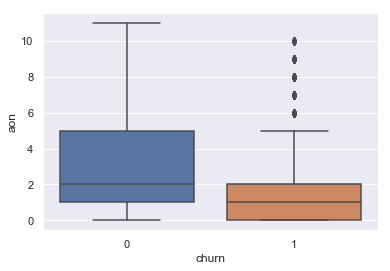

In [265]:
sns.boxplot(imp_cust.churn,imp_cust.aon)
plt.show()

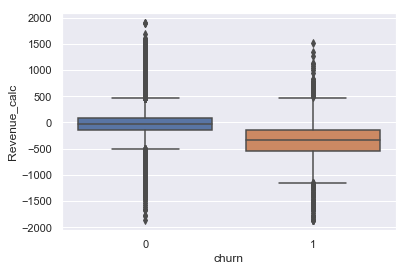

In [266]:
bivariate(imp_cust.churn,imp_cust.Revenue_calc)

In [267]:
##Now we shall attempt to plot box plot for all 8 month data

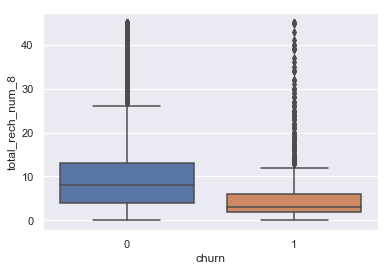

In [268]:
bivariate(imp_cust.churn,imp_cust.total_rech_num_8)

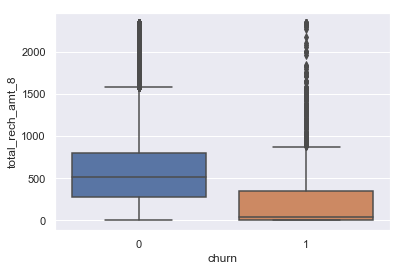

In [269]:
bivariate(imp_cust.churn,imp_cust.total_rech_amt_8)

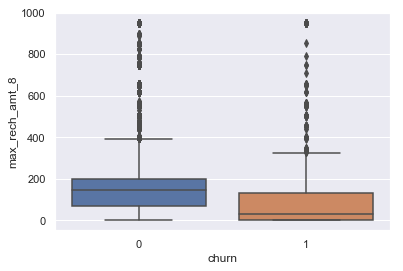

In [270]:
bivariate(imp_cust.churn,imp_cust.max_rech_amt_8)

***Based on the customer status***

We shall analyze the following parameters only for the 8 month based on the customer status:

1. Max recharge amount in month 8
2. Total recharge amount in month 8
3. Count of 2g usage in month 8
4. Count of 3g usage in month 8
5. Monthly 2g usage
6. Mobile internet usage volume 2g(in MB) in month 8
7. Mobile internet usage volume 3g(in MB) in month 8

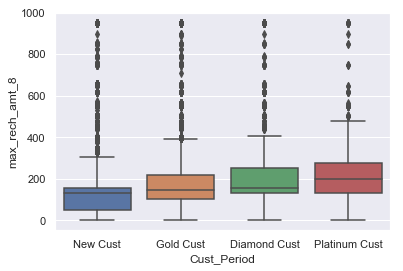

In [271]:
#Max recharge amount in month 8
bivariate(imp_cust.Cust_Period,imp_cust.max_rech_amt_8)

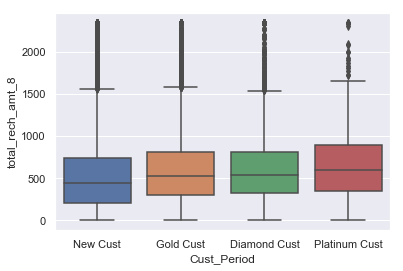

In [272]:
#Total recharge amount in month 8
bivariate(imp_cust.Cust_Period,imp_cust.total_rech_amt_8)

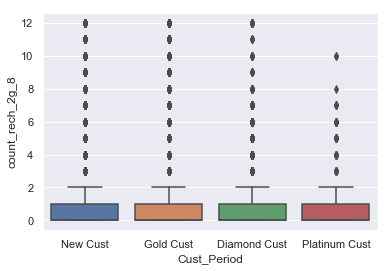

In [273]:
#Count of 2g usage in month 8
bivariate(imp_cust.Cust_Period,imp_cust.count_rech_2g_8)

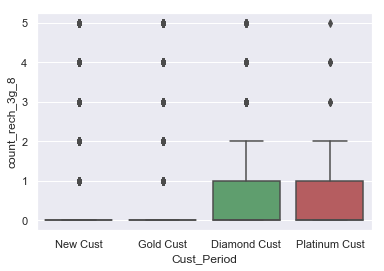

In [274]:
bivariate(imp_cust.Cust_Period,imp_cust.count_rech_3g_8)

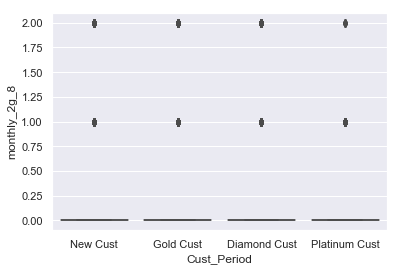

In [275]:
bivariate(imp_cust.Cust_Period,imp_cust.monthly_2g_8)

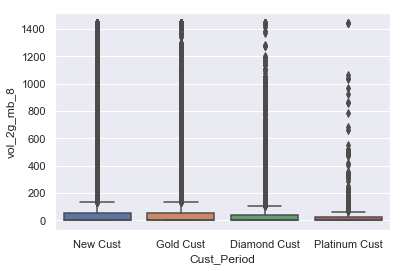

In [276]:
bivariate(imp_cust.Cust_Period,imp_cust.vol_2g_mb_8)

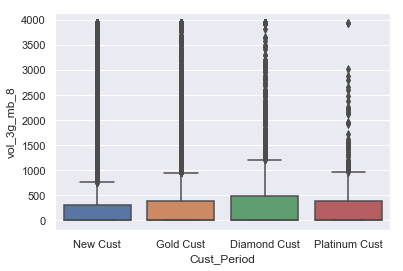

In [277]:
bivariate(imp_cust.Cust_Period,imp_cust.vol_3g_mb_8)

Important Inferences:

  1. In maximum recharge and total recharge amount for August month we could see more contribution from the diamond and platinum customers
       than the others but these customers are sparse in population when compared to the others.
       
    
  2. The 2g usage has fairly the same distribution among the customers and the median of the value is slightly above 0.
  
    
  3. The 3g on the other side the high valued customers ( diamond and platinum ) used these plans but the new users show no
       interest on these products, but their population representing the entire data is huge. So we need to plan for incentives
       for the most trustable customers (please refer to the most loyal customer chart above)to maximize the profit through their subscription.
       
        
  4. Majority of the customers never utilised 2g and 3g data volume only very few utilised th esignificant volume of data which
     is evident from the above box plots and that needs to be taken into account.
    

# Part--2 Model Building

In [278]:
## We shall remove some more columns which were exclusively created for the EDA purpose

cols_to_replace=['mobile_number','Cust_Period','Revenue_calc','Revenue_Status']

imp_cust.drop(cols_to_replace,axis=1,inplace=True)

In [279]:
print('Final dataframe\'s dimension used for model buildaing....',imp_cust.shape)

Final dataframe's dimension used for model buildaing.... (29953, 96)


***Train Test Split***

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [281]:
X = imp_cust.drop("churn", axis = 1)
y = imp_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [282]:
#We used stratify as the train and test becomes the exact representative
print('X_train dimension...',X_train.shape)
print('y_train dimension....',y_train.shape)
print('X_test dimension.....',X_test.shape)
print('y_test dimension....',y_test.shape)

X_train dimension... (20967, 95)
y_train dimension.... (20967,)
X_test dimension..... (8986, 95)
y_test dimension.... (8986,)


***Using PCA to reduce the columns***

We refer to the sklearn's dynamic pipeline creation model https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html in the robust pipeline implementation

In [283]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [284]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

Let us create a skeletal pipleine model which we wil be using for future cases

In [285]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [286]:
pca.fit(X_train)
X_train_pca = pca.fit_transform(X_train)

In [287]:
#Extacting the PCA series information from the pipleline
pca = pca.named_steps['pca']

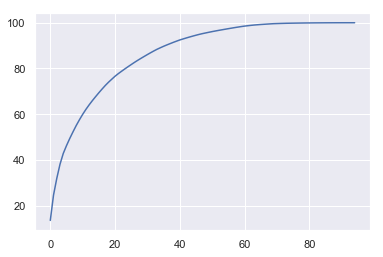

In [288]:
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.plot(cumulative_variance)

In [289]:
##We define the pipeline for PCA on Training data and without class imbalance

steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=65)),
         ("logistic", LogisticRegression())
        ]
pipeline = Pipeline(steps)

In [290]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.9288882529689512

In [291]:
##Evaluating on the test data

# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8140  116]
 [ 537  193]]
AUC:    	 0.89


In [292]:
##Calculating Accuracy and sensitivity

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [293]:
sensitivity=round(TP / float(TP+FN),2)
accuracy=round((TP+TN)/(TP+TN+FP+FN),2)
roc_score=round(roc_auc_score(y_test, y_pred_prob),2)
specificity=round(TN / float(TN+FP),2)

In [294]:
print('Sensitivity on test......',sensitivity)
print('Specificity on test......',sensitivity)
print('accuracy on test......',accuracy)
print('roc_score on test......',roc_score)


Sensitivity on test...... 0.26
Specificity on test...... 0.26
accuracy on test...... 0.93
roc_score on test...... 0.89


In [295]:
##Creating a dataframe to append these results

results = pd.DataFrame({'Model':['PCA-Logistic(no hyper param and no class balance)'], 'Accuaracy': [accuracy], 'Sensitivity': [sensitivity],
                        'ROC_Score':[roc_score],'Specificity':[specificity]})
results = results[['Model', 'Accuaracy', 'Sensitivity','ROC_Score','Specificity']]
results


,Model,Accuaracy,Sensitivity,ROC_Score,Specificity
0,PCA-Logistic(no hyper param and no class balance),0.93,0.26,0.89,0.99


***Logistic Regression with Hyper Parameter Tuning with class balanced technique***

In [296]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [297]:
##Getting the class imbalnce ratio

y_train.value_counts(normalize=True)

0    0.918777
1    0.081223
Name: churn, dtype: float64

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

Building the pipeline which includes both logistic and hyper parameter

In [298]:
##Defining pipeline and including hyper paramter
pca=PCA()
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.08, 1: 0.92})
C = [0.001,0.01,0.1,1,10,100]
penalty = ['l1', 'l2','Elastic-Net']
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
combined_pipeline = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [65, 75], 'logistic__penalty': penalty,'logistic__C':C}


In [299]:
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [300]:
# create gridsearch object
model = GridSearchCV(estimator=combined_pipeline,
                     cv=folds,
                     param_grid=params,
                     scoring='roc_auc', 
                     n_jobs=-1, 
                     verbose=1)

In [301]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.08,
                                                                         1: 0.92}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logistic__penalty': ['l1', 'l2', 'Elastic-Net'],
                         'pca__n_components': [65, 75]},
             scoring='roc_auc', verbose=1)

In [302]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8972772392406506
Best hyperparameters:  {'logistic__C': 100, 'logistic__penalty': 'l2', 'pca__n_components': 75}


In [303]:
##Evaluating on the test data

# predict churn on test data
y_pred = model.best_estimator_.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6696 1560]
 [ 122  608]]
AUC:    	 0.89


In [304]:
##Calculating Accuracy and sensitivity

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [305]:
sensitivity=round(TP / float(TP+FN),2)
specificity=round(TN / float(TN+FP),2)
accuracy=round((TP+TN)/(TP+TN+FP+FN),2)
roc_score=round(roc_auc_score(y_test, y_pred_prob),2)

In [306]:
print('Sensitivity on test......',sensitivity)
print('accuracy on test......',accuracy)
print('roc_score on test......',roc_score)
print('Specificity on test....,',specificity)


Sensitivity on test...... 0.83
accuracy on test...... 0.81
roc_score on test...... 0.89
Specificity on test...., 0.81


In [307]:

results_1 = pd.DataFrame({'Model':['PCA-Logistic(with hyper param and adjusted class balance)'], 'Accuaracy': [accuracy], 'Sensitivity': [sensitivity],
                        'ROC_Score':[roc_score],'Specificity':[specificity]})
results_1 = results_1[['Model', 'Accuaracy', 'Sensitivity','ROC_Score','Specificity']]
results=pd.concat([results,results_1])
results

,Model,Accuaracy,Sensitivity,ROC_Score,Specificity
0,PCA-Logistic(no hyper param and no class balance),0.93,0.26,0.89,0.99
0,PCA-Logistic(with hyper param and adjusted class balance),0.81,0.83,0.89,0.81


***Building the model using the Random Forest***

This time we use Randomised CV as grid search CV takes much time for evaluation 

In [308]:
from sklearn.model_selection import RandomizedSearchCV

In [309]:
from sklearn.ensemble import RandomForestClassifier

In [310]:
##Defining pipeline and including hyper paramter
pca=PCA(n_components=75)
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight={0:0.08, 1: 0.92},oob_score=True)
# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("RandomForest", rf)
        ]

# compile pipeline
combined_pipeline = Pipeline(steps)

# hyperparameter space
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = 42)

In [311]:
combined_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=75)),
                ('RandomForest',
                 RandomForestClassifier(class_weight={0: 0.08, 1: 0.92},
                                        n_jobs=-1, oob_score=True,
                                        random_state=42))])

In [312]:
model_rcv = RandomizedSearchCV(estimator=rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=folds,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50)

In [313]:
model_rcv.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight={0: 0.08,
                                                                  1: 0.92},
                                                    n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [314]:
# print best hyperparameters
print("Best AUC: ", model_rcv.best_score_)
print("Best hyperparameters: ", model_rcv.best_params_)

Best AUC:  0.9205417804952747
Best hyperparameters:  {'n_estimators': 60, 'min_samples_leaf': 20, 'max_features': 9, 'max_depth': 15}


In [315]:
##Evaluating on the test data

# predict churn on test data
y_pred = model_rcv.best_estimator_.predict(X_test)

# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)


# check area under curve
y_pred_prob = model_rcv.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7779  477]
 [ 201  529]]
AUC:    	 0.93


In [316]:
##Calculating Accuracy and sensitivity

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [317]:
sensitivity=round(TP / float(TP+FN),2)
specificity=round(TN / float(TN+FP),2)
accuracy=round((TP+TN)/(TP+TN+FP+FN),2)
roc_score=round(roc_auc_score(y_test, y_pred_prob),2)

In [318]:
print('Sensitivity on test......',sensitivity)
print('accuracy on test......',accuracy)
print('roc_score on test......',roc_score)
print('Specificity on test......',specificity)


Sensitivity on test...... 0.72
accuracy on test...... 0.92
roc_score on test...... 0.93
Specificity on test...... 0.94


In [319]:
pd.set_option("display.max_colwidth", -1)

In [320]:

results_1 = pd.DataFrame({'Model':['RandomForest(with hyperparameter and adjusted class balance)'], 'Accuaracy': [accuracy], 'Sensitivity': [sensitivity],
                        'ROC_Score':[roc_score],'Specificity':[specificity]})
results_1 = results_1[['Model', 'Accuaracy', 'Sensitivity','ROC_Score','Specificity']]
results=pd.concat([results,results_1])
results

,Model,Accuaracy,Sensitivity,ROC_Score,Specificity
0,PCA-Logistic(no hyper param and no class balance),0.93,0.26,0.89,0.99
0,PCA-Logistic(with hyper param and adjusted class balance),0.81,0.83,0.89,0.81
0,RandomForest(with hyperparameter and adjusted class balance),0.92,0.72,0.93,0.94


***Let us use the Bagging methods***

1. AdaBoost
2. XgBoost

**AdaBoost Model**

In [321]:
cols=X_train.columns.tolist()

In [322]:
#Scaling the train and test dataset
scaler = StandardScaler()
X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])

In [323]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [324]:
##First let us create a PCA model on training data with 0.95 variability 

pca = PCA(n_components=75)

In [325]:
##Transforming the Train data through the PCA

X_train_pca = pca.fit_transform(X_train)

In [326]:
X_train_pca

array([[ 1.55870962e+00,  2.39923025e+00, -2.23020155e+00, ...,
         1.10463973e-01, -1.24439491e-01, -9.48033013e-02],
       [-2.36501524e+00, -1.79766093e+00, -7.77799198e-01, ...,
         1.98551729e-03,  7.95162712e-02, -3.45418070e-02],
       [-5.84673324e+00, -1.04118235e+00, -1.18676550e+00, ...,
        -1.09228067e-02, -1.59275536e-02,  2.41760865e-03],
       ...,
       [-1.73765487e+00, -2.74124831e+00, -1.97269439e+00, ...,
        -1.59211825e-01,  1.79444062e-01, -1.45030544e-02],
       [-1.75129997e+00, -3.11089211e+00, -1.02260872e+00, ...,
        -1.19229496e-01,  3.22366268e-04, -1.16052865e-01],
       [ 4.00063109e+00,  5.36734114e-01, -4.76421532e+00, ...,
        -1.74612547e-01, -2.85609487e-01,  1.23732645e-01]])

Creating a shallow model of Decision Tree

In [327]:
shallow_tree = DecisionTreeClassifier(max_depth=4, random_state =42,class_weight={0:0.08, 1: 0.92})

In [328]:
# fit the shallow decision tree 
shallow_tree.fit(X_train_pca, y_train)
##Transforming the test data set through the PCA
X_test_pca = pca.transform(X_test)
# test error
y_pred = shallow_tree.predict(X_test_pca)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7412641887380369

In [329]:
#estimators = list(range(1, 60, 3))
#sensitivity={}
#accuracy = {}
#for n_est in estimators:
    #ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = n_est, random_state=42)
    #ABC.fit(X_train_pca, y_train)
    #y_pred = ABC.predict(X_test_pca)
    #confusion_matrix(y_test, y_pred)
    #TP = confusion[1,1] # true positive 
    #TN = confusion[0,0] # true negatives
    #FP = confusion[0,1] # false positives
    #FN = confusion[1,0] # false negatives
    #accuracy_score = (metrics.accuracy_score(y_test, y_pred).tolist())
    #accuracy[n_est]=accuracy_score
    #sensitivity_score=round(TP / float(TP+FN),2)
    #sensitivity[n_est]=sensitivity_score
    #lar_acc=sorted(accuracy.items(),key=lambda x:x[1],reverse=True)
    #lar_sens=sorted(sensitivity.items(),key=lambda x:x[1],reverse=True)
    #print('The best estimator for accuracy......',lar_acc[0][1],'and the estimator is',lar_acc[0][0])
    #print('The best estimator for sensitivity......',lar_sens[0][1],'and the estimator is',lar_sens[0][0])

***After the run we found that the best accuracy and sensitive score hovered around n_estimator=58***

We are going to comment the above code as it took so long time to execute ( nearly 15 mts )

In [330]:
##Building tha ADABOOST on Test
ABC = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 65, random_state=42)
ABC.fit(X_train_pca, y_train)
y_pred = ABC.predict(X_test_pca)
confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
accuracy_score = (metrics.accuracy_score(y_test, y_pred).tolist())
sensitivity_score=round(TP / float(TP+FN),2)
specificity=round(TN / float(TN+FP),2)
print('accuracy_score on test set.....',accuracy_score)
print('sensitivity_score on test set......',sensitivity_score)
print('Specificity score on test set.....',specificity)


accuracy_score on test set..... 0.8969508123748052
sensitivity_score on test set...... 0.72
Specificity score on test set..... 0.94


In [331]:
y_pred_prob = ABC.predict_proba(X_test_pca)[:, 1]
roc_score=round(roc_auc_score(y_test, y_pred_prob),2)

In [332]:

results_1 = pd.DataFrame({'Model':['AdaBoost(with hyperparameter and adjusted class balance)'], 'Accuaracy': [accuracy_score], 'Sensitivity': [sensitivity_score],
                        'ROC_Score':[roc_score],'Specificity':[specificity]})
results_1 = results_1[['Model', 'Accuaracy', 'Sensitivity','ROC_Score','Specificity']]
results=pd.concat([results,results_1])
results

,Model,Accuaracy,Sensitivity,ROC_Score,Specificity
0,PCA-Logistic(no hyper param and no class balance),0.930000,0.26,0.89,0.99
0,PCA-Logistic(with hyper param and adjusted class balance),0.810000,0.83,0.89,0.81
0,RandomForest(with hyperparameter and adjusted class balance),0.920000,0.72,0.93,0.94
0,AdaBoost(with hyperparameter and adjusted class balance),0.896951,0.72,0.80,0.94


**XG BOOST Model**

In [333]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection
from sklearn.utils.class_weight import compute_sample_weight

In [334]:
##xgb_model = xgb.XGBClassifier(tree_method = 'gpu_hist')
xgb_model = xgb.XGBClassifier(sample_weight=compute_sample_weight("balanced",y))

In [335]:
#parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              #'max_depth': [2, 4, 6, 8, 10],
              #'min_child_weight': [3, 7, 11, 19, 25],
              #'n_estimators': [50, 100, 150, 200, 300, 500]}

#scorer = metrics.make_scorer(metrics.roc_auc_score,
                             #greater_is_better=True,
                            # needs_proba=True,
                             #needs_threshold=False)


In [336]:
#clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                      # param_grid=parameters,
                                       #n_jobs=-1,
                                       #cv=4,
                                      # scoring=scorer,
                                      # refit=True)

#clf_xgb.fit(X_train_pca, y_train)


In [337]:
#print(clf_xgb.best_params_)
#print(clf_xgb.best_score_)
#print(clf_xgb.best_estimator_)

We ran the XGboost model on the GPU and the entire job took nearly an hour to complete the exhaustive GridSearch CV search.
So we commented all the above codes and we observed the below parameters are the best for our model.

**XG BOOST BEST PARAM**

{'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 25, 'n_estimators': 100}

0.9029236731951216

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=25, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [338]:
final_model = xgb.XGBClassifier(learning_rate=0.1,
                                max_depth=6,
                                min_child_weight=25,
                                n_estimators=100)


In [339]:
final_model.fit(X_train_pca, y_train)

[15:15:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=25, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [340]:
y_pred = final_model.predict(X_test_pca)

In [341]:
confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
accuracy_score = (metrics.accuracy_score(y_test, y_pred).tolist())
sensitivity_score=round(TP / float(TP+FN),2)
specificity=round(TN / float(TN+FP),2)
print('accuracy_score on test set.....',accuracy_score)
print('sensitivity_score on test set......',sensitivity_score)
print('Specificity score on test set.....',specificity)

accuracy_score on test set..... 0.9326730469619408
sensitivity_score on test set...... 0.72
Specificity score on test set..... 0.94


In [342]:
y_pred_prob = final_model.predict_proba(X_test_pca)[:, 1]
roc_score=round(roc_auc_score(y_test, y_pred_prob),2)

In [343]:

results_1 = pd.DataFrame({'Model':['XGBOOST(with hyperparameter and class balance)'], 'Accuaracy': [accuracy_score], 'Sensitivity': [sensitivity_score],
                        'ROC_Score':[roc_score],'Specificity':[specificity]})
results_1 = results_1[['Model', 'Accuaracy', 'Sensitivity','ROC_Score','Specificity']]
results=pd.concat([results,results_1])
results

,Model,Accuaracy,Sensitivity,ROC_Score,Specificity
0,PCA-Logistic(no hyper param and no class balance),0.930000,0.26,0.89,0.99
0,PCA-Logistic(with hyper param and adjusted class balance),0.810000,0.83,0.89,0.81
0,RandomForest(with hyperparameter and adjusted class balance),0.920000,0.72,0.93,0.94
0,AdaBoost(with hyperparameter and adjusted class balance),0.896951,0.72,0.80,0.94
0,XGBOOST(with hyperparameter and class balance),0.932673,0.72,0.90,0.94


Inferences:
    
   1. We found that the baseline model logistic model with no hyperparameter and class weights tend to have higher accuracy and ROC.However, the crucial metric Sensitivity is far less and thus making this model highly unreliable.
    
        
   2. We improvise the same logistic regression model by tuning hyper-parameters and appropriately chose the class weights and the result is more promising than the baseline model. However, there is a slight drop in the accuracy, the sensitivity is the highest.
   
    
   3. The Bagging(Random Forest), though has the better Accuracy and Specificity, the ROC and Sensitivity tend to be less than the logistic model used in (2.).
   
        
   4. Boosting Algorithm--Ada Boost, in general shows below par performance compared to the Random Forest model.
   
    
   5. XgBoost Algorithm has the highest ever accuracy but it falls behind the Sensitivity scores. According to other models, XGBoost has comparatively better ROC and Accuracy but as for the crucial metric is concerned it still falls behind the logistic regression
   
   
 
       

**Part--3 Model Interpretability**

Now we need to buid a better explainable model which imparts important features to the business for the decision making

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [345]:
cols=X_train.columns.tolist()

In [346]:
scaler = StandardScaler()
X_train[cols]=scaler.fit_transform(X_train[cols])
X_test[cols]=scaler.transform(X_test[cols])

In [347]:
##We have X_train,X_test,y_train and y_test data readymade

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20967, 95)
(20967,)
(8986, 95)
(8986,)


**We build decision tree model with hyper paramater tuning and analysing the effect of class weights**

Starting with the shallow model

In [348]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [349]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [350]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [351]:
confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [352]:
accuracy_score = (metrics.accuracy_score(y_test, y_pred).tolist())
sensitivity_score=round(TP / float(TP+FN),2)
specificity=round(TN / float(TN+FP),2)
print('accuracy_score on test set.....',accuracy_score)
print('sensitivity_score on test set......',sensitivity_score)
print('Specificity score on test set.....',specificity)

accuracy_score on test set..... 0.9326730469619408
sensitivity_score on test set...... 0.72
Specificity score on test set..... 0.94


**Hyperparameter Tuning in Decision Tree**

In [353]:


from sklearn.model_selection import GridSearchCV


In [354]:
dt = DecisionTreeClassifier(random_state=42)

In [355]:
##weights = np.linspace(0.0,0.99,100)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    "min_samples_split":[2,3,5,10,20],
    'criterion': ["gini", "entropy"],
    ##'class_weight': [{0:x, 1:1.0-x} for x in weights],
}

In [356]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="f1")

In [357]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'min_samples_split': [2, 3, 5, 10, 20]},
             scoring='f1', verbose=1)

In [358]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

**We could find that the Decision Tree's senitivity score is around 0.7, let us try to find the appropriate class weight to initialize**

In [359]:
dt_best_hypparam = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [360]:
weights = np.linspace(0.0,0.99,200)

In [361]:
params = {
    'criterion': ["gini", "entropy"],
    'class_weight': [{0:x, 1:1.0-x} for x in weights],
}

In [362]:
grid_search_1 = GridSearchCV(estimator=dt_best_hypparam,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="f1")

In [363]:
grid_search_1.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.004974874371859297,
                                           1: 0.9950251256281407},
                                          {0: 0.009949748743718593,
                                           1: 0.9900502512562814},
                                          {0: 0.014924623115577889,
                                           1: 0.9850753768844221},
                                          {0: 0.019899497487437186,
                                           1: 0.9801005025125629},
                                          {0: 0.0248743718...
                                          {0: 0.11442211055276383,
                                           1: 0.8855778894472361},
                  

In [364]:
dt_best = grid_search_1.best_estimator_
dt_best

DecisionTreeClassifier(class_weight={0: 0.22884422110552766,
                                     1: 0.7711557788944723},
                       max_depth=3, min_samples_leaf=5, random_state=42)

**Finalized Decision Tree on predicting test data***

In [365]:
y_train_pred = grid_search_1.best_estimator_.predict(X_train)
y_test_pred = grid_search_1.best_estimator_.predict(X_test)

**Evaluating the confusion metrics for the Decision Tree model**

In [366]:
confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [367]:
accuracy_score = (metrics.accuracy_score(y_test, y_test_pred).tolist())
sensitivity_score=round(TP / float(TP+FN),2)
specificity=round(TN / float(TN+FP),2)
print('accuracy_score on test set by DT model.....',accuracy_score)
print('sensitivity_score on test set by DT model......',sensitivity_score)
print('Specificity score on test set by DT model.....',specificity)

accuracy_score on test set by DT model..... 0.9432450478522145
sensitivity_score on test set by DT model...... 0.72
Specificity score on test set by DT model..... 0.94


In [368]:
print('Final ROC Score of the DT model,......',round(roc_auc_score(y_test, y_test_pred),2))

Final ROC Score of the DT model,...... 0.74


**Evaluating with the Random Forest Model**

In [369]:
##Let us investigate how random forest functions

rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight={0: 0.17909547738693468,
                                     1: 0.8209045226130653},oob_score=True)

In [370]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [371]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [372]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight={0: 0.17909547738693468,
                                                            1: 0.8209045226130653},
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [373]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(class_weight={0: 0.17909547738693468,
                                     1: 0.8209045226130653},
                       max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

**Fitting the best model on the test and train including the class weight**

In [374]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

**Predicting the accuracy, ROC and sensitivity of the model through the confusion matrix**

In [375]:
confusion_matrix(y_test, y_test_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
accuracy_score = (metrics.accuracy_score(y_test, y_test_pred).tolist())
sensitivity_score=round(TP / float(TP+FN),2)
specificity=round(TN / float(TN+FP),2)
print('accuracy_score on test set by RF model.....',accuracy_score)
print('sensitivity_score on test set by RF model......',sensitivity_score)
print('Specificity score on test set by RF model.....',specificity)


accuracy_score on test set by RF model..... 0.9449143111506788
sensitivity_score on test set by RF model...... 0.72
Specificity score on test set by RF model..... 0.94


In [376]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

**Getting the top 20 important features in the table**

In [377]:
##Extarcting top-20 features

imp_df=imp_df.sort_values(by='Imp',ascending=False).head(20)
imp_df

,Varname,Imp
26,total_ic_mou_8,0.102778
0,arpu_8,0.060847
31,total_rech_amt_8,0.059874
17,total_og_mou_8,0.052904
33,last_day_rch_amt_8,0.045963
21,loc_ic_mou_8,0.038869
32,max_rech_amt_8,0.030402
3,roam_ic_mou_8,0.027954
4,roam_og_mou_8,0.026805
19,loc_ic_t2m_mou_8,0.024338


**Ploting the top 20 important features**

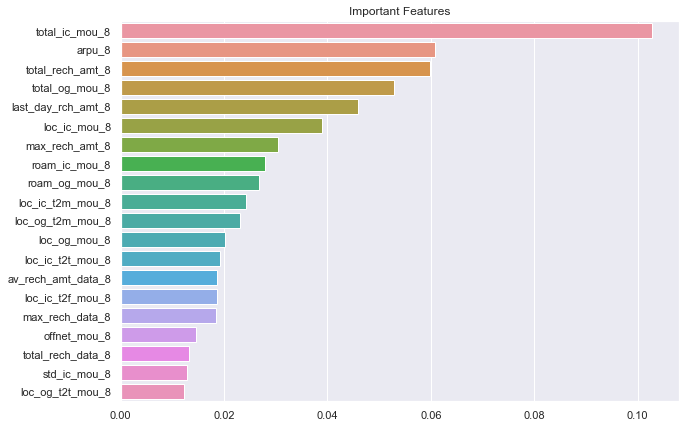

In [378]:
plt.figure(figsize=[10,7])
sns.set_style("darkgrid")
x=imp_df['Varname'].values.tolist()
y=imp_df['Imp'].values.tolist()
p=sns.barplot(y,x)
sns.set()
plt.title('Important Features')
plt.show()

**Business Recommendation**

 1.The churn rate is highest for the newly joined customers, also we are able to observe that the even loyal customers do churn as the rate of % is nearly 50% for them as opposed 75% for the new customers.(loyal customers in service >8years)
 
 2.Over 40% of customers generated revenue in the the 8 month which is more or the same as generated by them in the previous months of June and July. These customers need to be targeted
 
3.Over 58% of customers roughly show the declined path towards the revenue generation as they sporadically recharge in the August month compared to June and July. We need to roll out incentive schemes to retain them.
 
4.There are specific customers who belong to all the categories like New,Gold,Diamond and Platinum who recharged more than the 
  previous months and also have not churned. You can find the details of those customers in the 'most_loyal_cust' csv sheet.
    
5.Also these people have not swayed from the business. So we can give them special discounts.The phone numbers are found in the most_loyal_cust sheet.For newly joined people we shall offer them a few couple of free services and insentives or gifts and 	for the people who are associated with the service over a longer period of time(say>5 years:Gold,Diamond or Platinum) we shall offer them a free scheme say monthly topup at free cost etc.,

6.In maximum recharge and total recharge amount for August month we could see more contribution from the diamond and platinum customers than the others but these customers are sparse in population when compared to the others and their contribution towards the business growth is indispensable

7.The 2g usage has fairly the same distribution among the customers and the median of the value is slightly above 0.

8.The 3g on the other side the high valued customers ( diamond and platinum ) used these plans but the new users show no interest on these products, but their population representing the entire data is huge. So we need to plan for incentives for the most trustable customers (please refer to the most loyal customer chart above)to maximize the profit through their subscription.

9.Majority of the customers never utilised 2g and 3g data volume only very few utilised the significant volume of data which is evident from the above box plots and that needs to be taken into account. Might be due to less schemes or due to stringent price policies make the customers to think about an alternative.

10.We found like special schemes like FB user or night scheme were not duly appreciated by the users. So it could be beneficial
  to launch a survey or pool which represents the population of the customers to understand their needs and based on that, we     shall provide the schemes instead of investing in the resources prodical which adds only a trifling portion to the returns.
  
11.Apart from this, we find an immense value in the 8 month KPI data, as they play a dominant role in determing the pattern of customers. In the above chart, the important takeaway is that the features total incoming calls, average revenue per user,total
recharge amount are some of the determintal factors to drive the business model.
    
  